# PeTS Equation of State - One Component

Original publication of the _perturbation theory for truncated and shifted Lennard-Jones fluids_ (PeTS) of M. Heier, S. Stephan, J. Liu, W.G. Chapman, Mol. Phys. **116**, 2083 (2018);
https://doi.org/10.1080/00268976.2018.1447153

In [1]:
import numpy as np
from feos_pets.eos import *
from feos_pets.si import *
from feos_pets import *
import matplotlib.pyplot as plt
import pandas as pd

## Specifying PeTS Parameters

In [2]:
ide = Identifier("1")         # Identifyer
mw = 1.0                      # molecular mass in [GRAM / MOL]
epsilon_k = 1.0 * KELVIN    # Lennard-Jones interaction parameter
sigma = 1.0 * ANGSTROM        # Lennard-Jones size parameter

mp = PetsRecord(sigma / ANGSTROM, epsilon_k / KELVIN)
pr = PureRecord(ide, mw, mp)

pp = PetsParameters.new_pure(pr)

print('Model record: \n', mp, '\n')
print('Pure record: \n', pr, '\n')
print('PeTS parameters: \n', pp, '\n')

Model record: 
 PetsRecord(sigma=1, epsilon_k=1) 

Pure record: 
 PureRecord(
	identifier=Identifier(cas=1),
	molarweight=1,
	model_record=PetsRecord(sigma=1, epsilon_k=1),
) 

PeTS parameters: 
 PetsParameters(
	molarweight=[1]
	sigma=[1]
	epsilon_k=[1]
) 



## Definition of Reference Data

The molecular simulation reference data is taken from J. Vrabec, G.K. Kedia, G. Fuchs, H. Hasse, Mol. Phys. **104**, 1509 (2006);
https://doi.org/10.1080/00268970600556774

Critical point reference data is taken from the original publication of M. Heier, S. Stephan, J. Liu, W.G. Chapman, H. Hasse, K. Langenbach, Mol. Phys. **116**, 2083 (2018);
https://doi.org/10.1080/00268976.2018.1447153

Molecular simulation data for enthalpies of vaporization is taken from of S. Stephan, H. Hasse, Mol. Phys. **118**, e1699185 (2020);
https://doi.org/10.1080/00268976.2019.1699185

In [20]:
# Dara from Vrabec et al. (2006)
data = np.array([
    [0.64,    0.00217,    0.8176,    0.00351,    5.7118],
    [0.67,    0.00335,    0.8024,    0.00525,    5.5910],
    [0.70,    0.00479,    0.7866,    0.00727,    5.4666],
    [0.73,    0.00697,    0.7704,    0.01036,    5.325 ],
    [0.76,    0.00944,    0.7538,    0.01374,    5.179 ],
    [0.79,    0.01241,    0.7361,    0.01776,    5.022 ],
    [0.82,    0.01640,    0.7181,    0.0233,     4.844 ],
    [0.85,    0.0214,     0.6986,    0.0303,     4.639 ],
    [0.88,    0.0274,     0.6784,    0.0392,     4.413 ],
    [0.91,    0.0336,     0.6556,    0.0483,     4.172 ],
    [0.94,    0.0417,     0.6309,    0.0616,     3.87  ],
    [0.97,    0.0504,     0.6032,    0.0763,     3.56  ],
    [1.00,    0.0606,     0.5712,    0.0960,     3.18  ],
    [1.03,    0.0730,     0.530,     0.127,      2.63  ],
    [1.06,    0.0855,     0.463,     0.168,      1.88  ]
])



df = pd.DataFrame(data, columns=['T*', 'p*', 'rho^L*', 'rho^V*', 'Delta^LV h*'])

# Critical point data extracted from Heier et al. (2018), figure 1; unclear origin
T_c = 1.0850094876660341
p_c = 0.10073800738007378
rho_c = 0.3194085027726432

# Critical point data extracted from Vrabec et al. (2018)
T_c_vrabec = 1.0779
p_c_vrabec = np.exp(3.1664 - 5.9809 / T_c_vrabec + 0.01498 / T_c_vrabec**3)
rho_c_vrabec = 0.3190

# Critical point data extracted from Heier et al. (2018), figure 1; critical point of original PeTS implementation
T_c_pets_heier = 1.0884250474383301
p_c_pets_heier = 0.10184501845018448
rho_c_pets_heier = 0.3077634011090573

## Definition of PeTS Equation of State

In [10]:
pets = Pets(pp)

## Phase Diagram of Pure Fluid

In [11]:
cp = State.critical_point_pure(eos=pets)
print(cp)
T_c_pets = cp[0].temperature
p_c_pets = cp[0].pressure()
rho_c_pets = cp[0].density

[T = 1.08905 K, ρ = 513.38386 kmol/m³]


In [12]:
dia = PhaseDiagramPure(eos=pets, min_temperature=0.64*epsilon_k, npoints=100)

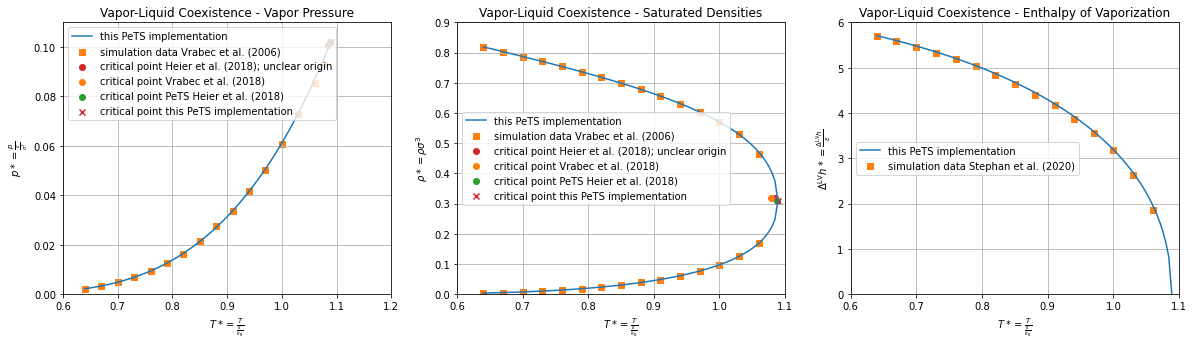

In [23]:
f, ax = plt.subplots(1,3, figsize=(20,5))

ax[0].plot(dia.temperature/epsilon_k, dia.pressure/(epsilon_k * KB / sigma**3), color='tab:blue', label='this PeTS implementation')
ax[0].scatter(df['T*'], df['p*'], marker='s', color='tab:orange', label='simulation data Vrabec et al. (2006)')
ax[0].scatter(T_c, p_c, marker='o', color='tab:red', label='critical point Heier et al. (2018); unclear origin')
ax[0].scatter(T_c_vrabec, p_c_vrabec, marker='o', color='tab:orange', label='critical point Vrabec et al. (2018)')
ax[0].scatter(T_c_pets_heier, p_c_pets_heier, marker='o', color='tab:green', label='critical point PeTS Heier et al. (2018)')
ax[0].scatter(T_c_pets/epsilon_k, p_c_pets/(epsilon_k * KB / sigma**3), marker='x', color='tab:red', label='critical point this PeTS implementation')
ax[0].set_title('Vapor-Liquid Coexistence - Vapor Pressure')
ax[0].set_xlabel(r'$T* = \frac{T}{\frac{\epsilon}{k_\mathrm{B}}}$')
ax[0].set_ylabel(r'$p* = \frac{p}{\frac{\epsilon}{\sigma^3}}$')
ax[0].set_xlim(0.6, 1.2)
ax[0].set_ylim(0.0, 0.11)
ax[0].legend(loc='upper left')
ax[0].grid()

ax[1].plot(dia.temperature/epsilon_k, dia.density_liquid*NAV*sigma**3, color='tab:blue', label='this PeTS implementation')
ax[1].plot(dia.temperature/epsilon_k, dia.density_vapor*NAV*sigma**3, color='tab:blue')
ax[1].scatter(df['T*'], df['rho^L*'], marker='s', color='tab:orange', label='simulation data Vrabec et al. (2006)')
ax[1].scatter(df['T*'], df['rho^V*'], marker='s', color='tab:orange')
ax[1].scatter(T_c, rho_c, marker='o', color='tab:red', label='critical point Heier et al. (2018); unclear origin')
ax[1].scatter(T_c_vrabec, rho_c_vrabec, marker='o', color='tab:orange', label='critical point Vrabec et al. (2018)')
ax[1].scatter(T_c_pets_heier, rho_c_pets_heier, marker='o', color='tab:green', label='critical point PeTS Heier et al. (2018)')
ax[1].scatter(T_c_pets/epsilon_k, rho_c_pets*NAV*sigma**3, marker='x', color='tab:red', label='critical point this PeTS implementation')
ax[1].set_title('Vapor-Liquid Coexistence - Saturated Densities')
ax[1].set_xlabel(r'$T* = \frac{T}{\frac{\epsilon}{k_\mathrm{B}}}$')
ax[1].set_ylabel(r'$\rho* = \rho \sigma^3$')
ax[1].set_xlim(0.6, 1.1)
ax[1].set_ylim(0.0, 0.9)
ax[1].legend(loc='center left')
ax[1].grid()

ax[2].plot(dia.temperature/epsilon_k, (dia.molar_enthalpy_vapor - dia.molar_enthalpy_liquid)/(epsilon_k*NAV*KB), color='tab:blue', label='this PeTS implementation')
ax[2].scatter(df['T*'], df['Delta^LV h*'], marker='s', color='tab:orange', label='simulation data Vrabec et al. (2006)')
ax[2].set_title('Vapor-Liquid Coexistence - Enthalpy of Vaporization')
ax[2].set_xlabel(r'$T* = \frac{T}{\frac{\epsilon}{k_\mathrm{B}}}$')
ax[2].set_ylabel(r'$\Delta^\mathrm{LV} h* = \frac{\Delta^\mathrm{LV} h}{\epsilon}$')
ax[2].set_xlim(0.6, 1.1)
ax[2].set_ylim(0.0, 6.0)
ax[2].legend(loc='center left')
ax[2].grid()

In [14]:
# Pandas dataframe of complete phase diagram information
pdia = pd.DataFrame(dia.to_dict())

pdia

,density vapor,molar enthalpy liquid,molar enthalpy vapor,molar entropy vapor,molar entropy liquid,temperature,density liquid,pressure
0,5892.917088,2.347091,2.394522,0.047254,-0.026858,0.640000,1.359958e+06,3.027452e+04
1,6256.715373,2.347066,2.394365,0.046486,-0.026899,0.644536,1.355988e+06,3.231517e+04
2,6637.298606,2.347043,2.394209,0.045729,-0.026937,0.649072,1.352014e+06,3.446027e+04
3,7035.173601,2.347022,2.394053,0.044984,-0.026972,0.653608,1.348034e+06,3.671331e+04
4,7450.855330,2.347003,2.393897,0.044248,-0.027003,0.658143,1.344049e+06,3.907782e+04
...,...,...,...,...,...,...,...,...
95,321552.029200,2.358030,2.371195,-0.004692,-0.016985,1.070906,7.282380e+05,1.274987e+06
96,343874.402031,2.358797,2.370306,-0.005612,-0.016313,1.075441,7.008988e+05,1.307424e+06
97,371753.463415,2.359743,2.369237,-0.006689,-0.015480,1.079977,6.676045e+05,1.340532e+06
98,410400.824066,2.361036,2.367826,-0.008073,-0.014334,1.084513,6.230186e+05,1.374330e+06
